# Analysis on how hitting impacts team performance

In this part of the analysis, we are trying to figure out if hitting makes a teams chances of winning, any better in the leage.
We start this analysis with a hypothesis. As per our hypothesis, the player who takes more hits, helps his team keep the puck in possession more which might eventually result in more goals and finally more wins.

For this purpose, we are going to need the player data, as well as the team's data.

In [2]:
%run ./data-loading.ipynb

In [3]:
hockey_data = fetch_player_data()
team_data = fetch_team_data()

In [4]:
hockey_data.head()

Team Position  GP  Goals  Total Assists  First Assists  \
Year Player                                                                 
2015 Jamie Benn     DAL        F  82     35             52             32   
     John Tavares   NYI        F  82     38             48             30   
     Sidney Crosby  PIT        F  77     28             56             31   
     Alex Ovechkin  WSH        F  81     53             28             21   
     Jakub Voracek  PHI        F  82     22             59             31   

                    Second Assists  Total Points  Shots    SH%  Shot Attempts  \
Year Player                                                                     
2015 Jamie Benn                 20            87    253  13.83            466   
     John Tavares               18            86    278  13.67            471   
     Sidney Crosby              25            84    237  11.81            380   
     Alex Ovechkin               7            81    395  13.42            825   
     Jakub Voracek              28            81    221   9.95            424   

                    Hits  Hits Taken  
Year Player                           
2015 Jamie Benn      120         101  
     John Tavares     48         103  
     Sidney Crosby    66         117  
     Alex Ovechkin   259         108  
     Jakub Voracek    55         139

Adding a column to get the total number of hits taken per game by a player

In [5]:
#Creating another column to find the average of hits taken per game for each player
hockey_data["Hits taken/game"] = hockey_data['Hits Taken']/hockey_data['GP']

In [6]:
hockey_data.head()

Team Position  GP  Goals  Total Assists  First Assists  \
Year Player                                                                 
2015 Jamie Benn     DAL        F  82     35             52             32   
     John Tavares   NYI        F  82     38             48             30   
     Sidney Crosby  PIT        F  77     28             56             31   
     Alex Ovechkin  WSH        F  81     53             28             21   
     Jakub Voracek  PHI        F  82     22             59             31   

                    Second Assists  Total Points  Shots    SH%  Shot Attempts  \
Year Player                                                                     
2015 Jamie Benn                 20            87    253  13.83            466   
     John Tavares               18            86    278  13.67            471   
     Sidney Crosby              25            84    237  11.81            380   
     Alex Ovechkin               7            81    395  13.42            825   
     Jakub Voracek              28            81    221   9.95            424   

                    Hits  Hits Taken  Hits taken/game  
Year Player                                            
2015 Jamie Benn      120         101         1.231707  
     John Tavares     48         103         1.256098  
     Sidney Crosby    66         117         1.519481  
     Alex Ovechkin   259         108         1.333333  
     Jakub Voracek    55         139         1.695122

Now to quickly see the correlation between 'hits taken and 'goals' scored.

In [7]:
#hockey_data.corr() - Hits taken might have to do soemthing with the goal scoring ability of the player
hockey_data['Goals'].corr(hockey_data['Hits Taken'])

0.239385932641219

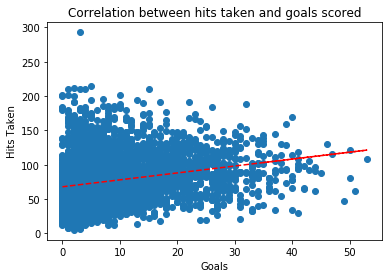

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = hockey_data['Goals']
y = hockey_data['Hits Taken']
plt.xlabel("Goals")
plt.ylabel("Hits Taken")
plt.title("Correlation between hits taken and goals scored")
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Although there is a positive value here, it is not strong to suggest whether it is actually true.
Now, to focus on 'hits taken', we create a subset of the player data with just the team, player, year and hits taken/game columns

In [9]:
df=hockey_data[['Team','Hits taken/game']].copy()
df.head()

Team  Hits taken/game
Year Player                             
2015 Jamie Benn     DAL         1.231707
     John Tavares   NYI         1.256098
     Sidney Crosby  PIT         1.519481
     Alex Ovechkin  WSH         1.333333
     Jakub Voracek  PHI         1.695122

In [10]:
#removing 'Player' column from the index
df1=df.reset_index(level=['Player'])
df1.head()

,Player,Team,Hits taken/game
Year,,,
2015,Jamie Benn,DAL,1.231707
2015,John Tavares,NYI,1.256098
2015,Sidney Crosby,PIT,1.519481
2015,Alex Ovechkin,WSH,1.333333
2015,Jakub Voracek,PHI,1.695122


Since every player might have gotten hit at least once in the last 5 seasons, we compress our data set to the top 50 rows of the hits taken/game in descending order. The purpose of doing this is to pick a few players who are being consitently hit and see how their respective teams perform.

In [11]:
#Getting the top 50 rows with 'hits taken/game' in descending order
most_hits_player=df1.nlargest(50,'Hits taken/game')
most_hits_player.head()

,Player,Team,Hits taken/game
Year,,,
2015,Dennis Seidenberg,BOS,3.573171
2015,Kevan Miller,BOS,3.121951
2016,Tom Gilbert,MTL,3.111111
2019,Marcus Pettersson,PIT,3.000000
2018,Kevan Miller,BOS,2.955882


In [12]:
#Check how many times a player appears in the list of most hits taken
x_count=most_hits_player['Player'].value_counts(dropna=False)
#subgroup2 = x_count[x_count.(most_hits_player['Player'].value_counts(dropna=False))>2]

In [31]:
#Creating a dataframe to filter out the top players
x_count = pd.DataFrame(most_hits_player.Player.value_counts().reset_index().values, columns=["Player", "tot_count"])
x_countindex = x_count.sort_index(axis = 0, ascending=True)
subgroup2 = x_countindex[x_countindex.tot_count>2]
subgroup2

,Player,tot_count
0,Kevan Miller,4
1,Ian Cole,3


In [14]:
#Sub selecting the year and the teams for which these selected players have played for
sel_player = ('Kevan Miller','Ian Cole')
select_player = df1[df1.Player.isin (sel_player)]
select_player

,Player,Team,Hits taken/game
Year,,,
2015,Ian Cole,STL,1.462963
2015,Ian Cole,PIT,2.800000
2015,Kevan Miller,BOS,3.121951
2016,Kevan Miller,BOS,2.732394
2016,Ian Cole,PIT,2.557143
2017,Ian Cole,PIT,2.654321
2017,Kevan Miller,BOS,2.741379
2018,Kevan Miller,BOS,2.955882
2018,Ian Cole,PIT,1.957447


In [15]:
#Since Ian Cole played for multiple teams in 2015 and 2018, aggregating his average hits taken per game
Total_hits=select_player.groupby(['Year', 'Player']).agg({'Hits taken/game':'sum'})
Total_hits

Hits taken/game
Year Player                       
2015 Ian Cole             4.262963
     Kevan Miller         3.121951
2016 Ian Cole             2.557143
     Kevan Miller         2.732394
2017 Ian Cole             2.654321
     Kevan Miller         2.741379
2018 Ian Cole             3.557447
     Kevan Miller         2.955882
2019 Ian Cole             1.704225
     Kevan Miller         2.410256

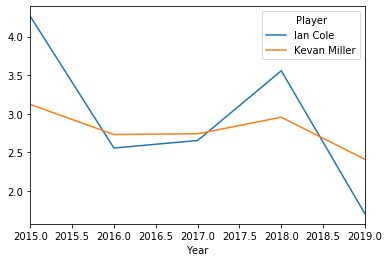

In [16]:
#Creating a line plot to see how they performed over the past 5 years and how consistent they are
Total_hits1=Total_hits.reset_index(level=['Year','Player'])
#Total_hits1
Total_hits1.pivot(index='Year',columns='Player',values='Hits taken/game').plot()

As per the above, Kevan Miller seems to be more consistent than Ian Cole. Ian Cole also changed teams during 2015 and 2018 seasons so the team chemistry might have impacted performance.

Now as we have figured out the the top two players who have taken the most number of hits per game over the last 5 seasons, we shift our focus to the teams

In [17]:
#Removing the column Team from index for team data
team_data1=team_data.reset_index(level=['Team'])
#df1["Team_Win_percentage"] = team_data['Win percentage']
team_data1.head()

,Team,Wins,Losses,Overtime Losses,Points
Year,,,,,
2015,ANA,51,24,7,109
2015,ARI,24,50,8,56
2015,BOS,41,27,14,96
2015,BUF,23,51,8,54
2015,CAR,30,41,11,71


In [33]:
#Adding column 'win percentage' in the team data set
team_data1["Win percentage"] = (team_data1.Wins/82)*100
team_data1.head()

,Team,Wins,Losses,Overtime Losses,Points,Win percentage
Year,,,,,,
2015,ANA,51,24,7,109,62.195122
2015,ARI,24,50,8,56,29.268293
2015,BOS,41,27,14,96,50.000000
2015,BUF,23,51,8,54,28.048780
2015,CAR,30,41,11,71,36.585366


To see how these top 2 player's teams perform over the years based on the hits they have taken, we join the two data subsets.

In [35]:
team_win=select_player.merge(team_data1, how = 'inner', on = ['Team', 'Year'])
team_win

,Player,Team,Hits taken/game,Wins,Losses,Overtime Losses,Points,Win percentage
Year,,,,,,,,
2015,Ian Cole,STL,1.462963,51,24,7,109,62.195122
2015,Ian Cole,PIT,2.800000,43,27,12,98,52.439024
2015,Kevan Miller,BOS,3.121951,41,27,14,96,50.000000
2016,Kevan Miller,BOS,2.732394,42,31,9,93,51.219512
2016,Ian Cole,PIT,2.557143,48,26,8,104,58.536585
2017,Ian Cole,PIT,2.654321,50,21,11,111,60.975610
2017,Kevan Miller,BOS,2.741379,44,31,7,95,53.658537
2018,Kevan Miller,BOS,2.955882,50,20,12,112,60.975610
2018,Ian Cole,PIT,1.957447,47,29,6,100,57.317073


In [36]:
hockey_datanew=hockey_data.reset_index(level=['Player'])
top_list = ('Kevan Miller','Ian Cole')
top = hockey_datanew[hockey_datanew.Player.isin (top_list)]
team_win1=top.merge(team_data1, how = 'inner', on = ['Team', 'Year'])
team_win1.head()

,Player,Team,Position,GP,Goals,Total Assists,First Assists,Second Assists,Total Points,Shots,SH%,Shot Attempts,Hits,Hits Taken,Hits taken/game,Wins,Losses,Overtime Losses,Points,Win percentage
Year,,,,,,,,,,,,,,,,,,,,
2015,Ian Cole,STL,D,54,4,5,1,4,9,52,7.69,117,42,79,1.462963,51,24,7,109,62.195122
2015,Ian Cole,PIT,D,20,1,7,3,4,8,31,3.23,68,31,56,2.800000,43,27,12,98,52.439024
2015,Kevan Miller,BOS,D,41,2,5,1,4,7,37,5.41,87,87,128,3.121951,41,27,14,96,50.000000
2016,Kevan Miller,BOS,D,71,5,13,6,7,18,64,7.81,145,164,194,2.732394,42,31,9,93,51.219512
2016,Ian Cole,PIT,D,70,0,12,4,8,12,72,0.00,145,122,179,2.557143,48,26,8,104,58.536585


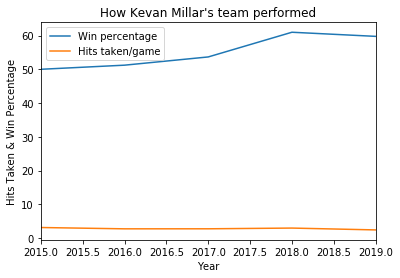

In [49]:
team_win2=team_win1.reset_index(level=['Year'])
team_win3=team_win2[team_win2.Player == 'Kevan Miller']
team_win3.plot(x="Year", y=["Win percentage", "Hits taken/game"])
plt.xlabel("Year")
plt.ylabel("Hits Taken & Win Percentage")
plt.title("How Kevan Millar's team performed")
plt.show()

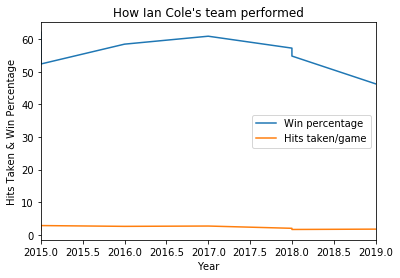

In [50]:
team_win2=team_win1.reset_index(level=['Year'])
team_win3=team_win2[team_win2.Player == 'Ian Cole']
team_win3.plot(x="Year", y=["Win percentage", "Hits taken/game"])
plt.xlabel("Year")
plt.ylabel("Hits Taken & Win Percentage")
plt.title("How Ian Cole's team performed")
plt.show()

From the above two graphs, it is pretty clear that the team's performance isn't affected with the how many times a player has been hit. Which leads us to our final check.

Creating a subset of data for each player bringing in their respective team's winning percentage. We can then try to find a correlation between the hits/taken and win percentage for all players and their respective teams.

In [37]:
hockey_datanew=hockey_data.reset_index(level=['Player','Year'])
team_win2=hockey_datanew.merge(team_data1, how = 'inner', on = ['Team', 'Year'])
team_win2.head()

,Year,Player,Team,Position,GP,Goals,Total Assists,First Assists,Second Assists,Total Points,...,SH%,Shot Attempts,Hits,Hits Taken,Hits taken/game,Wins,Losses,Overtime Losses,Points,Win percentage
0,2015,Jamie Benn,DAL,F,82,35,52,32,20,87,...,13.83,466,120,101,1.231707,41,31,10,92,50.0
1,2015,Tyler Seguin,DAL,F,71,37,40,33,7,77,...,13.21,529,63,34,0.478873,41,31,10,92,50.0
2,2015,Jason Spezza,DAL,F,82,17,45,19,26,62,...,8.33,412,16,66,0.804878,41,31,10,92,50.0
3,2015,Cody Eakin,DAL,F,78,19,21,6,15,40,...,13.38,268,62,78,1.000000,41,31,10,92,50.0
4,2015,John Klingberg,DAL,D,65,11,29,18,11,40,...,11.22,237,54,165,2.538462,41,31,10,92,50.0


Group the year and team aggregating the hits

In [39]:
Team_hits=team_win2.groupby(['Year', 'Team','Win percentage']).agg({'Hits Taken':'sum','Hits':'sum'})
ax1=Team_hits.reset_index(level=['Year','Team','Win percentage'])
ax1['Year'] = ax1.Year.astype(int)
ax1.head()

,Year,Team,Win percentage,Hits Taken,Hits
0,2015,ANA,62.195122,1987,2086
1,2015,ARI,29.268293,2209,2185
2,2015,BOS,50.000000,2205,1985
3,2015,BUF,28.048780,1560,2134
4,2015,CAR,36.585366,2246,1874


Below, is the scatter plot which shows whether the win percentage go up with the number of hits for a team

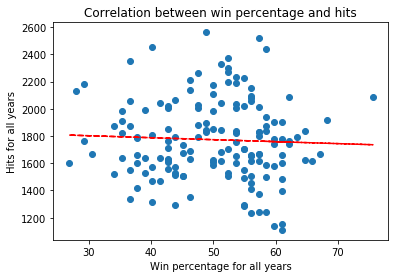

In [51]:
import numpy as np
import matplotlib.pyplot as plt
x = ax1['Win percentage']
y = ax1['Hits']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Win percentage for all years")
plt.ylabel("Hits for all years")
plt.title("Correlation between win percentage and hits")

plt.show()

Below scatter plot shows if the win percentage go up with the number of hits taken by a team. It does have a postive correlation but insufficient to draw a conclusion.

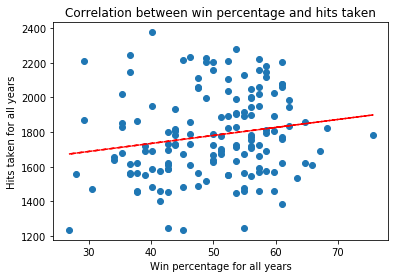

In [52]:
x = ax1['Win percentage']
y = ax1['Hits Taken']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Win percentage for all years")
plt.ylabel("Hits taken for all years")
plt.title("Correlation between win percentage and hits taken")

plt.show()

# Conclusion

We started our analysis with a theory that the players who get hit more, help their respective teams keep the puck in possession. 
There does seem to be a bit of a correlation between the number of goals scored and also the team win percentage with the hits taken by a player, it is not strong enough to draw a conclusion. 

On the contrary though, the players that are being hit more during the game, might be the one's that are not moving swiftly on ice. We do not have the required data to do this analysis.

In order for us to decide on a player, the 'hits taken' attribute might be a good number to look at, but should not be the deciding factor.